In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from support_vector import LinearSVM, PolySVC
from sklearn.svm import LinearSVC, SVC


In [12]:
data = pd.read_csv("circle_data.csv")
data

,Feature 1,Feature 2,Label
0,0.893586,-0.351167,0
1,0.621767,0.808279,0
2,-0.232287,0.836077,0
3,-0.340426,-0.067212,1
4,-0.136397,0.433088,1
...,...,...,...
195,0.240742,0.069092,1
196,0.554566,0.715996,0
197,0.626031,-0.413289,0
198,0.113632,-0.299066,1


In [13]:
X = data.drop(["Label"],axis =1)
y = data["Label"]
y = np.where(y==0,-1,1)
scaler = StandardScaler()
X_Std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree= 2)
X_poly = poly.fit_transform(X_Std)

1.0

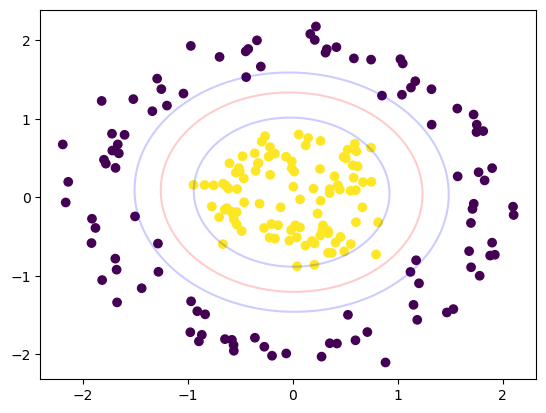

In [14]:
model = LinearSVM(C = 1)
model.fit(X_poly,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
meshgred_poly = poly.fit_transform(meshgred_points)
z = model.descion_function(meshgred_poly)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_poly,y)

1.0

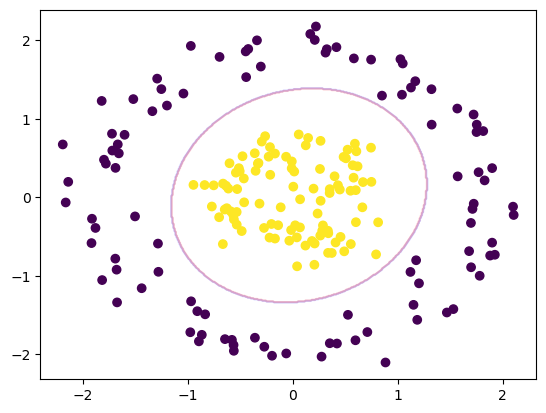

In [15]:
model = PolySVC(kernal="poly")
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_Std,y)

1.0

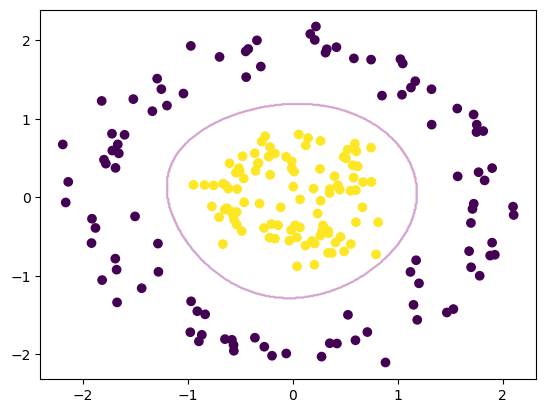

In [18]:
model = SVC(kernel ="rbf",degree=2)
model.fit(X_Std,y)
plt.scatter(X_Std[:,0],X_Std[:,1],c = y)
xx1, xx2 = np.meshgrid(
    np.arange(-2,2,.01),
    np.arange(-2,2,.01)
)
meshgred_points = np.array([xx1.ravel(),xx2.ravel()]).T
z = model.predict(meshgred_points)
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z,alpha = .2,levels = [-1,0,1],colors = ["b","r","b"])
model.score(X_Std,y)